In [32]:
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point

import missingno as msn

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [33]:
country = geopandas.read_file("./tuto/gz_2010_us_040_00_5m.json")
country.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"(POLYGON ((-88.124658 30.28364, -88.0868119999..."
1,0400000US02,02,Alaska,,570640.950,"(POLYGON ((-166.10574 53.988606, -166.075283 5..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.538593 37.000674, -112.534545 3..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.042964 33.019219, -94.043036 33...."
4,0400000US06,06,California,,155779.220,"(POLYGON ((-122.421439 37.869969, -122.421341 ..."


In [34]:
type(country)

geopandas.geodataframe.GeoDataFrame

In [35]:
type(country.geometry)

geopandas.geoseries.GeoSeries

In [36]:
type(country.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

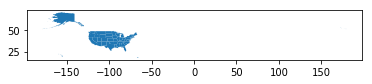

In [37]:
country.plot()

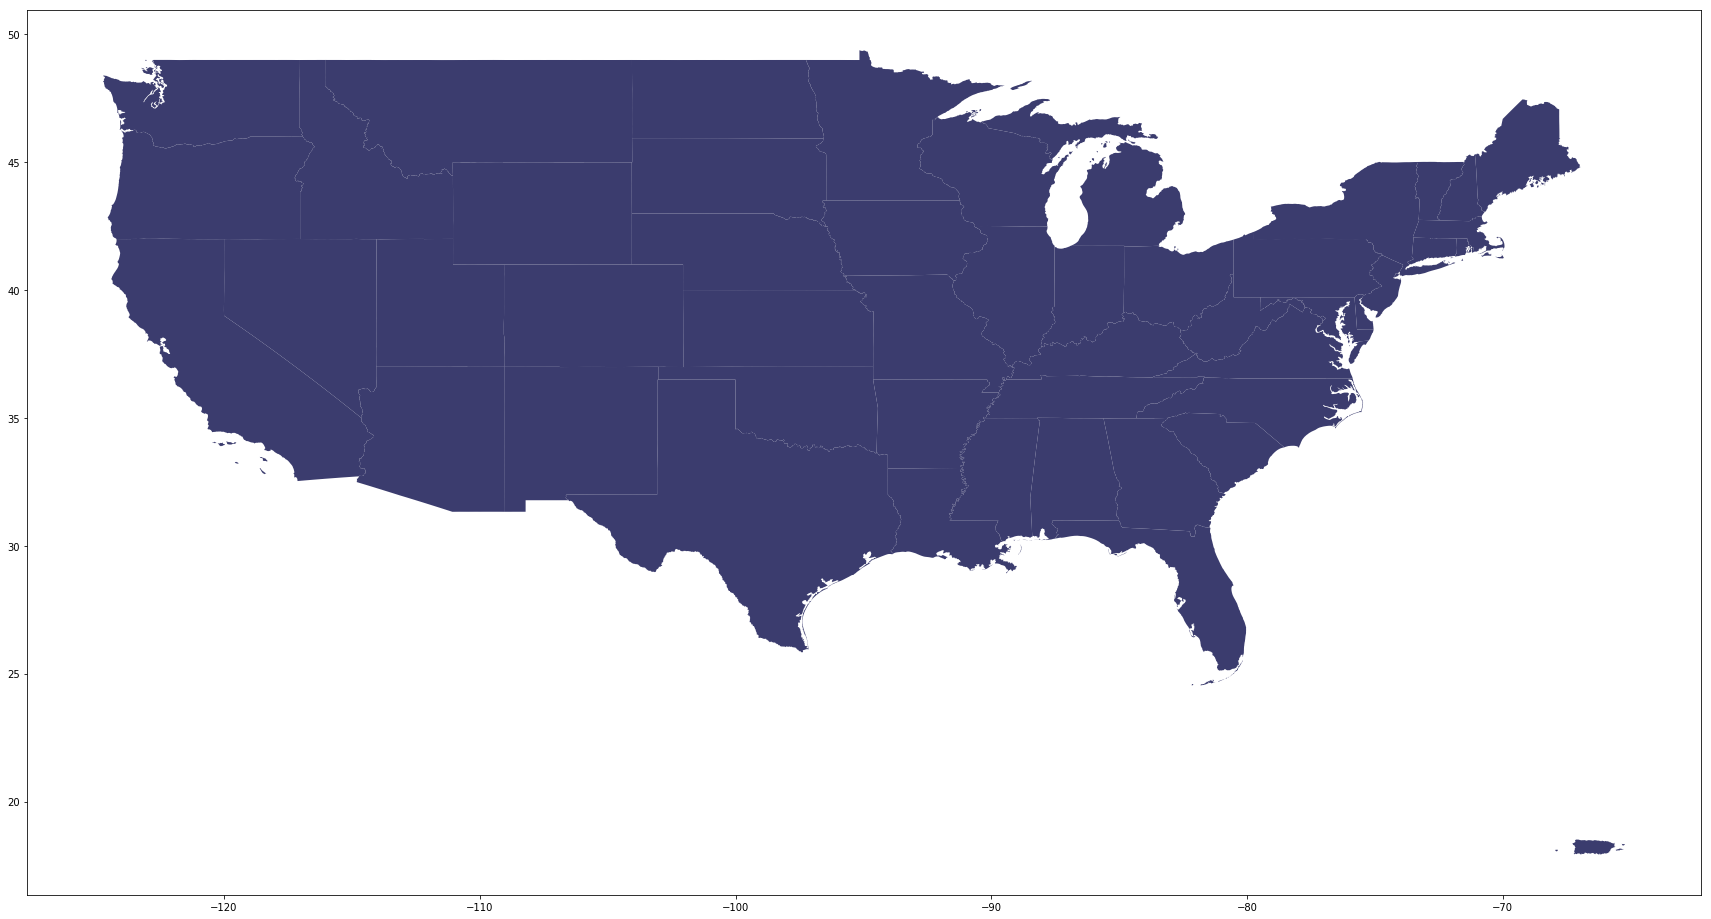

In [38]:
# get rid Hawiaii and Alaska
country[country['NAME'].isin(['Alaska','Hawaii'])==False].plot(figsize=(30,20), color='#3B3C6E')

In [39]:
barry = pd.read_csv('./Storms/stormhistory.csv');
barry.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,07/10/2019 11:00,28.5,86.4,30,1011,WSW at 8 MPH (240 deg),Potential Tropical Cyclone,Two,07/10/2019 10:42,Stewart
1,1A,07/10/2019 14:00,28.3,86.7,30,1011,WSW at 8 MPH (240 deg),Potential Tropical Cyclone,Two,07/10/2019 13:39,Stewart
2,2,07/10/2019 17:00,28.1,87.4,30,1011,WSW at 8 MPH (245 deg),Potential Tropical Cyclone,Two,07/10/2019 16:42,Stewart
3,2A,07/10/2019 20:00,27.9,87.8,30,1010,WSW at 8 MPH (245 deg),Potential Tropical Cyclone,Two,07/10/2019 19:59,Cangialosi
4,3,07/10/2019 23:00,27.7,88.0,30,1009,WSW at 9 MPH (245 deg),Potential Tropical Cyclone,Two,07/10/2019 22:57,Cangialosi


In [40]:
barry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 11 columns):
AdvisoryNumber    46 non-null object
Date              46 non-null object
Lat               46 non-null float64
Long              46 non-null float64
Wind              46 non-null int64
Pres              46 non-null int64
Movement          46 non-null object
Type              46 non-null object
Name              46 non-null object
Received          46 non-null object
Forecaster        40 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 4.0+ KB


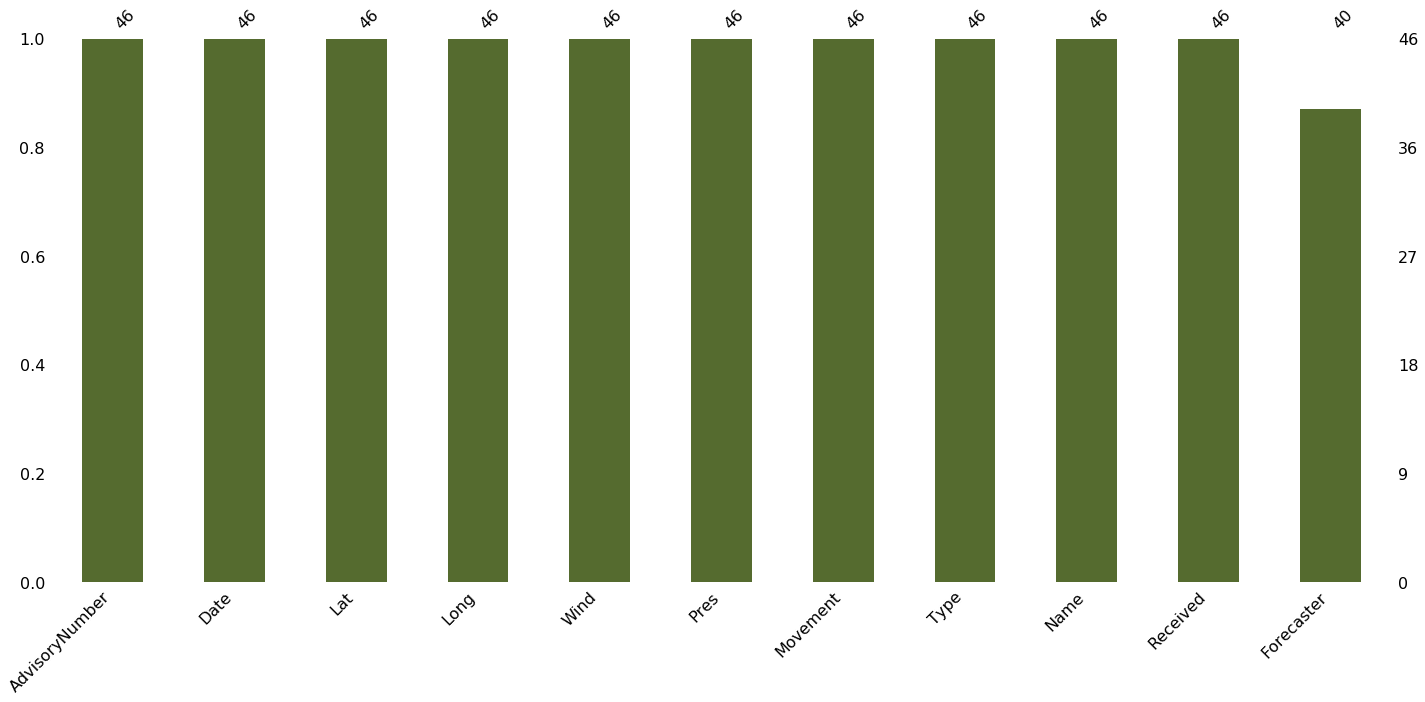

In [41]:
# number of rows. Notice that Forecaster column has 6 missing values
msn.bar(barry, color='darkolivegreen')

In [42]:
barry.describe()

,Lat,Long,Wind,Pres
count,46.000000,46.000000,46.000000,46.000000
mean,31.415217,90.334783,40.760870,1003.782609
std,4.347105,2.832213,18.677598,6.626254
min,27.500000,82.000000,10.000000,991.000000
25%,28.125000,88.550000,30.000000,998.000000
50%,29.450000,90.900000,40.000000,1005.500000
75%,33.325000,92.775000,57.500000,1009.000000
max,41.000000,93.600000,75.000000,1012.000000


In [43]:
barry = barry.drop(['Advisory','Forecaster','Received'], axis=1)
barry.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received
0,1,07/10/2019 11:00,28.5,86.4,30,1011,WSW at 8 MPH (240 deg),Potential Tropical Cyclone,Two,07/10/2019 10:42
1,1A,07/10/2019 14:00,28.3,86.7,30,1011,WSW at 8 MPH (240 deg),Potential Tropical Cyclone,Two,07/10/2019 13:39
2,2,07/10/2019 17:00,28.1,87.4,30,1011,WSW at 8 MPH (245 deg),Potential Tropical Cyclone,Two,07/10/2019 16:42
3,2A,07/10/2019 20:00,27.9,87.8,30,1010,WSW at 8 MPH (245 deg),Potential Tropical Cyclone,Two,07/10/2019 19:59
4,3,07/10/2019 23:00,27.7,88.0,30,1009,WSW at 9 MPH (245 deg),Potential Tropical Cyclone,Two,07/10/2019 22:57


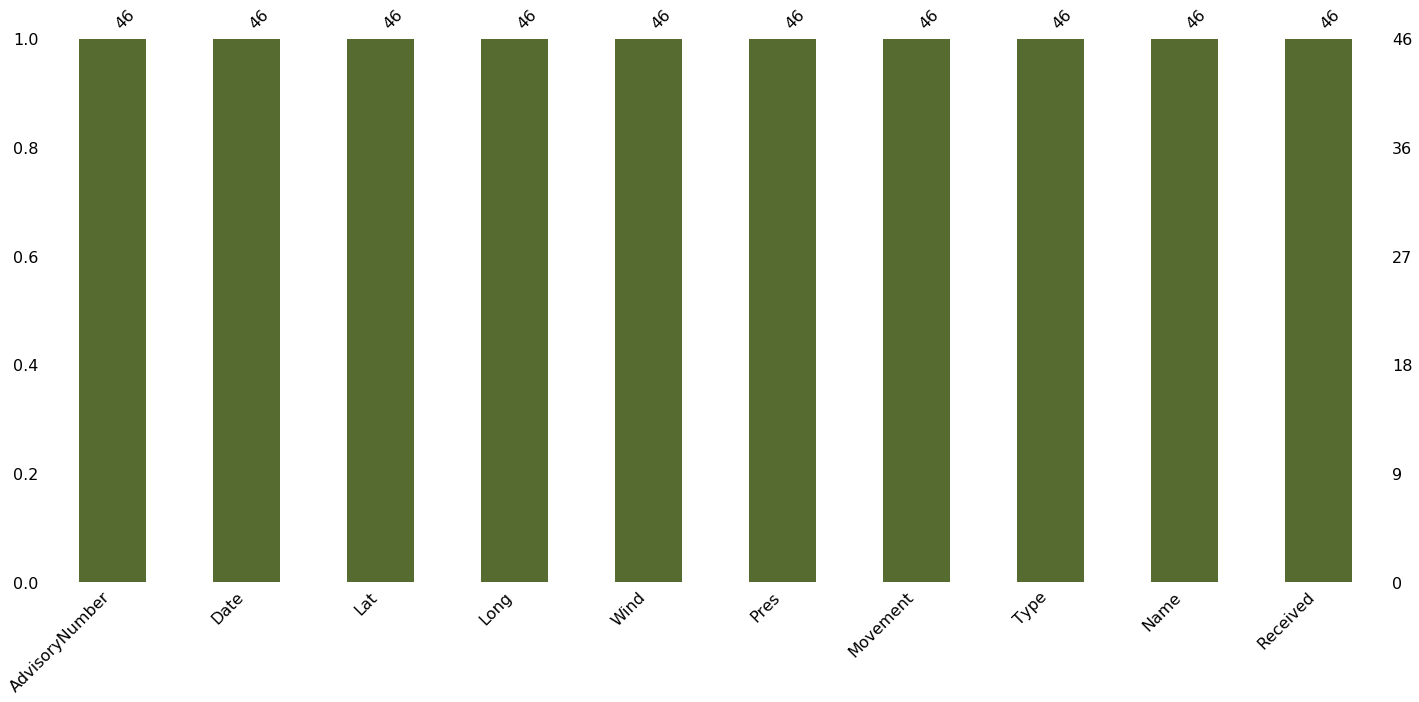

In [44]:
msn.bar(barry, color='darkolivegreen')

In [45]:
barry['Long'] = 0 - barry['Long']
barry.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received
0,1,07/10/2019 11:00,28.5,-86.4,30,1011,WSW at 8 MPH (240 deg),Potential Tropical Cyclone,Two,07/10/2019 10:42
1,1A,07/10/2019 14:00,28.3,-86.7,30,1011,WSW at 8 MPH (240 deg),Potential Tropical Cyclone,Two,07/10/2019 13:39
2,2,07/10/2019 17:00,28.1,-87.4,30,1011,WSW at 8 MPH (245 deg),Potential Tropical Cyclone,Two,07/10/2019 16:42
3,2A,07/10/2019 20:00,27.9,-87.8,30,1010,WSW at 8 MPH (245 deg),Potential Tropical Cyclone,Two,07/10/2019 19:59
4,3,07/10/2019 23:00,27.7,-88.0,30,1009,WSW at 9 MPH (245 deg),Potential Tropical Cyclone,Two,07/10/2019 22:57


In [46]:
# combine the longitude and latitude and combine to make coordinates
barry['coordinates'] = barry[['Long', 'Lat']].values.tolist()
barry.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,coordinates
0,1,07/10/2019 11:00,28.5,-86.4,30,1011,WSW at 8 MPH (240 deg),Potential Tropical Cyclone,Two,07/10/2019 10:42,"[-86.4, 28.5]"
1,1A,07/10/2019 14:00,28.3,-86.7,30,1011,WSW at 8 MPH (240 deg),Potential Tropical Cyclone,Two,07/10/2019 13:39,"[-86.7, 28.3]"
2,2,07/10/2019 17:00,28.1,-87.4,30,1011,WSW at 8 MPH (245 deg),Potential Tropical Cyclone,Two,07/10/2019 16:42,"[-87.4, 28.1]"
3,2A,07/10/2019 20:00,27.9,-87.8,30,1010,WSW at 8 MPH (245 deg),Potential Tropical Cyclone,Two,07/10/2019 19:59,"[-87.8, 27.9]"
4,3,07/10/2019 23:00,27.7,-88.0,30,1009,WSW at 9 MPH (245 deg),Potential Tropical Cyclone,Two,07/10/2019 22:57,"[-88.0, 27.7]"


In [47]:
barry['coordinates'] = barry['coordinates'].apply(Point)
barry.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,coordinates
0,1,07/10/2019 11:00,28.5,-86.4,30,1011,WSW at 8 MPH (240 deg),Potential Tropical Cyclone,Two,07/10/2019 10:42,POINT (-86.40000000000001 28.5)
1,1A,07/10/2019 14:00,28.3,-86.7,30,1011,WSW at 8 MPH (240 deg),Potential Tropical Cyclone,Two,07/10/2019 13:39,POINT (-86.7 28.3)
2,2,07/10/2019 17:00,28.1,-87.4,30,1011,WSW at 8 MPH (245 deg),Potential Tropical Cyclone,Two,07/10/2019 16:42,POINT (-87.40000000000001 28.1)
3,2A,07/10/2019 20:00,27.9,-87.8,30,1010,WSW at 8 MPH (245 deg),Potential Tropical Cyclone,Two,07/10/2019 19:59,POINT (-87.8 27.9)
4,3,07/10/2019 23:00,27.7,-88.0,30,1009,WSW at 9 MPH (245 deg),Potential Tropical Cyclone,Two,07/10/2019 22:57,POINT (-88 27.7)


In [48]:
type(barry)

pandas.core.frame.DataFrame

In [49]:
type(barry['coordinates'])

pandas.core.series.Series

In [50]:
barry = geopandas.GeoDataFrame(barry, geometry='coordinates')
barry.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,coordinates
0,1,07/10/2019 11:00,28.5,-86.4,30,1011,WSW at 8 MPH (240 deg),Potential Tropical Cyclone,Two,07/10/2019 10:42,POINT (-86.40000000000001 28.5)
1,1A,07/10/2019 14:00,28.3,-86.7,30,1011,WSW at 8 MPH (240 deg),Potential Tropical Cyclone,Two,07/10/2019 13:39,POINT (-86.7 28.3)
2,2,07/10/2019 17:00,28.1,-87.4,30,1011,WSW at 8 MPH (245 deg),Potential Tropical Cyclone,Two,07/10/2019 16:42,POINT (-87.40000000000001 28.1)
3,2A,07/10/2019 20:00,27.9,-87.8,30,1010,WSW at 8 MPH (245 deg),Potential Tropical Cyclone,Two,07/10/2019 19:59,POINT (-87.8 27.9)
4,3,07/10/2019 23:00,27.7,-88.0,30,1009,WSW at 9 MPH (245 deg),Potential Tropical Cyclone,Two,07/10/2019 22:57,POINT (-88 27.7)


In [51]:
type(barry)

geopandas.geodataframe.GeoDataFrame

In [52]:
type(barry['coordinates'])

geopandas.geoseries.GeoSeries

In [53]:
barry[barry['Name']=='Two']

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,coordinates
0,1,07/10/2019 11:00,28.5,-86.4,30,1011,WSW at 8 MPH (240 deg),Potential Tropical Cyclone,Two,07/10/2019 10:42,POINT (-86.40000000000001 28.5)
1,1A,07/10/2019 14:00,28.3,-86.7,30,1011,WSW at 8 MPH (240 deg),Potential Tropical Cyclone,Two,07/10/2019 13:39,POINT (-86.7 28.3)
2,2,07/10/2019 17:00,28.1,-87.4,30,1011,WSW at 8 MPH (245 deg),Potential Tropical Cyclone,Two,07/10/2019 16:42,POINT (-87.40000000000001 28.1)
3,2A,07/10/2019 20:00,27.9,-87.8,30,1010,WSW at 8 MPH (245 deg),Potential Tropical Cyclone,Two,07/10/2019 19:59,POINT (-87.8 27.9)
4,3,07/10/2019 23:00,27.7,-88.0,30,1009,WSW at 9 MPH (245 deg),Potential Tropical Cyclone,Two,07/10/2019 22:57,POINT (-88 27.7)
5,3A,07/11/2019 02:00,27.5,-88.0,30,1009,WSW at 9 MPH (245 deg),Potential Tropical Cyclone,Two,07/11/2019 01:57,POINT (-88 27.5)
6,4,07/11/2019 05:00,27.5,-88.2,30,1009,W at 5 MPH (260 deg),Potential Tropical Cyclone,Two,07/11/2019 04:51,POINT (-88.2 27.5)
7,4A,07/11/2019 08:00,27.6,-88.5,35,1005,W at 5 MPH (270 deg),Potential Tropical Cyclone,Two,07/11/2019 08:03,POINT (-88.5 27.6)


In [54]:
barry.Name.value_counts()

Barry    34
Two       8
BARRY     4
Name: Name, dtype: int64

In [55]:
print("Mean wind speed {} mph\nMax wind speed {} mph".format(round(barry.Wind.mean(),4),barry.Wind.max()))

Mean wind speed 40.7609 mph
Max wind speed 75 mph


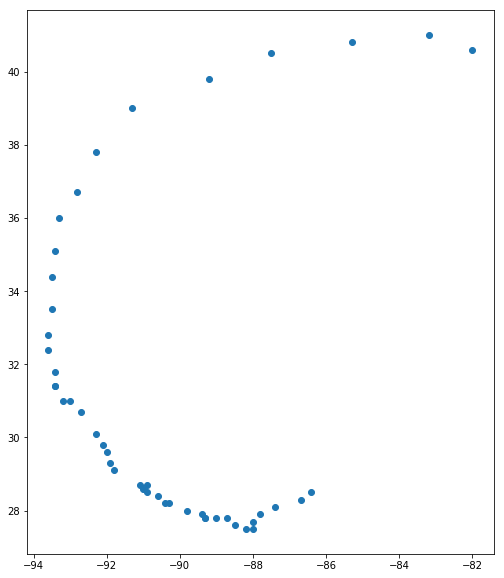

In [56]:
barry.plot(figsize=(20,10))

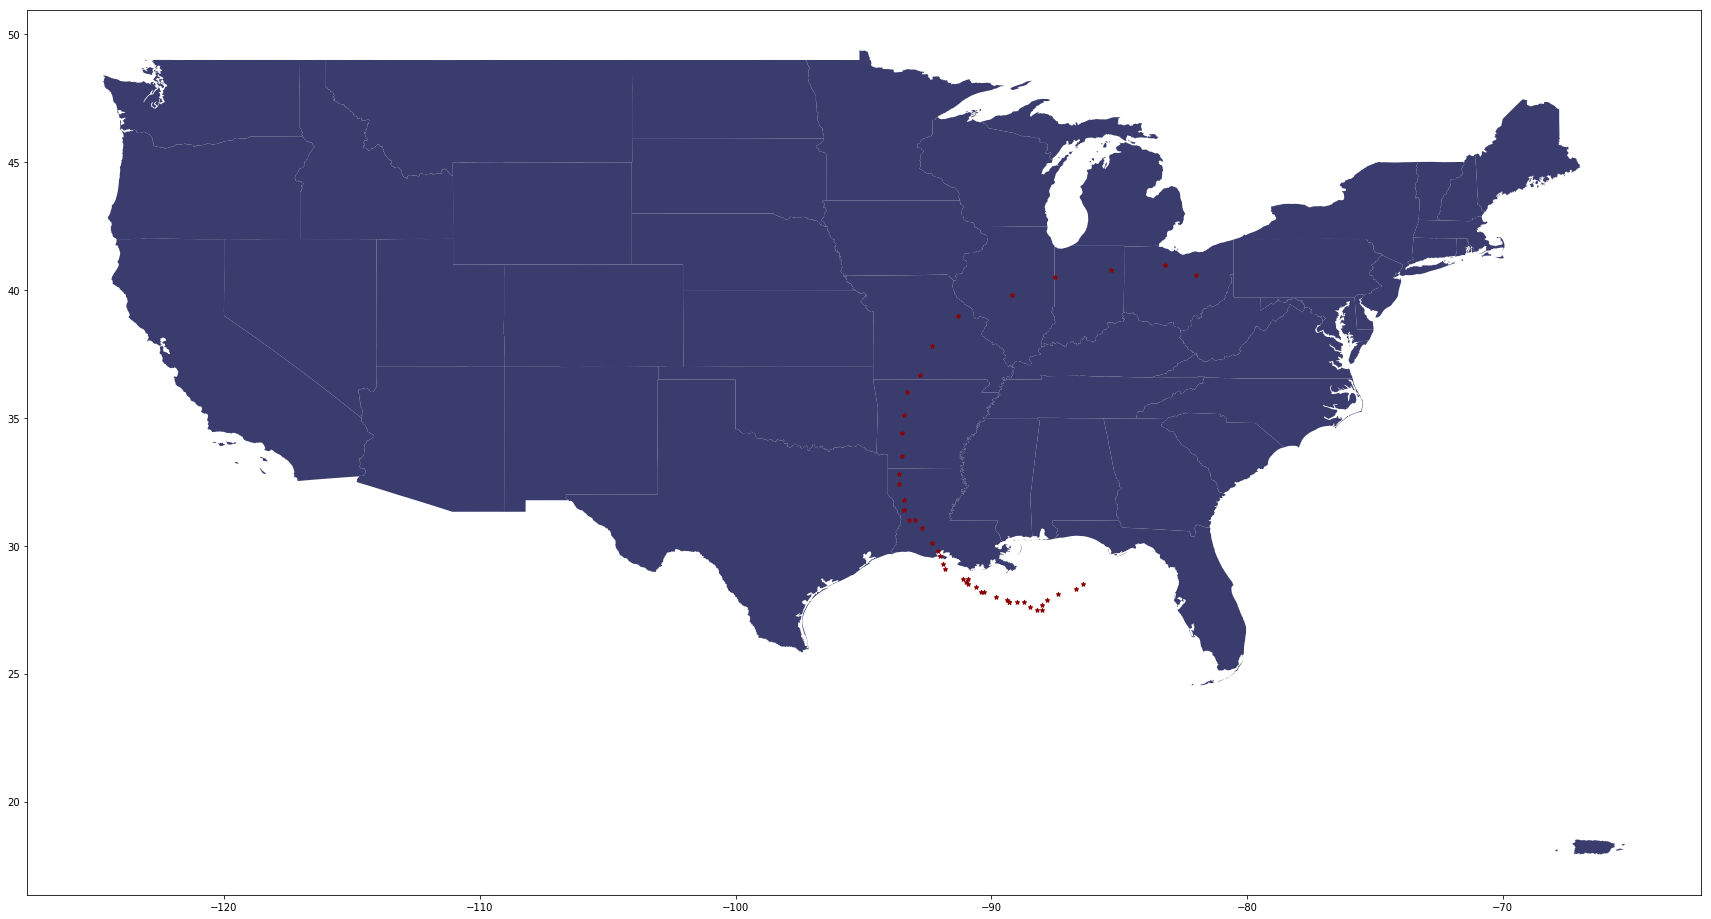

In [57]:
fig, ax = plt.subplots(1, figsize=(30,20))
base = country[country['NAME'].isin(['Alaska', 'Hawaii'])==False].plot(ax=ax, color='#3B3C6E')

barry.plot(ax=base, color='darkred', marker='*', markersize=20)

Text(0.5, 1.0, 'Hurricane Barry in US Map')

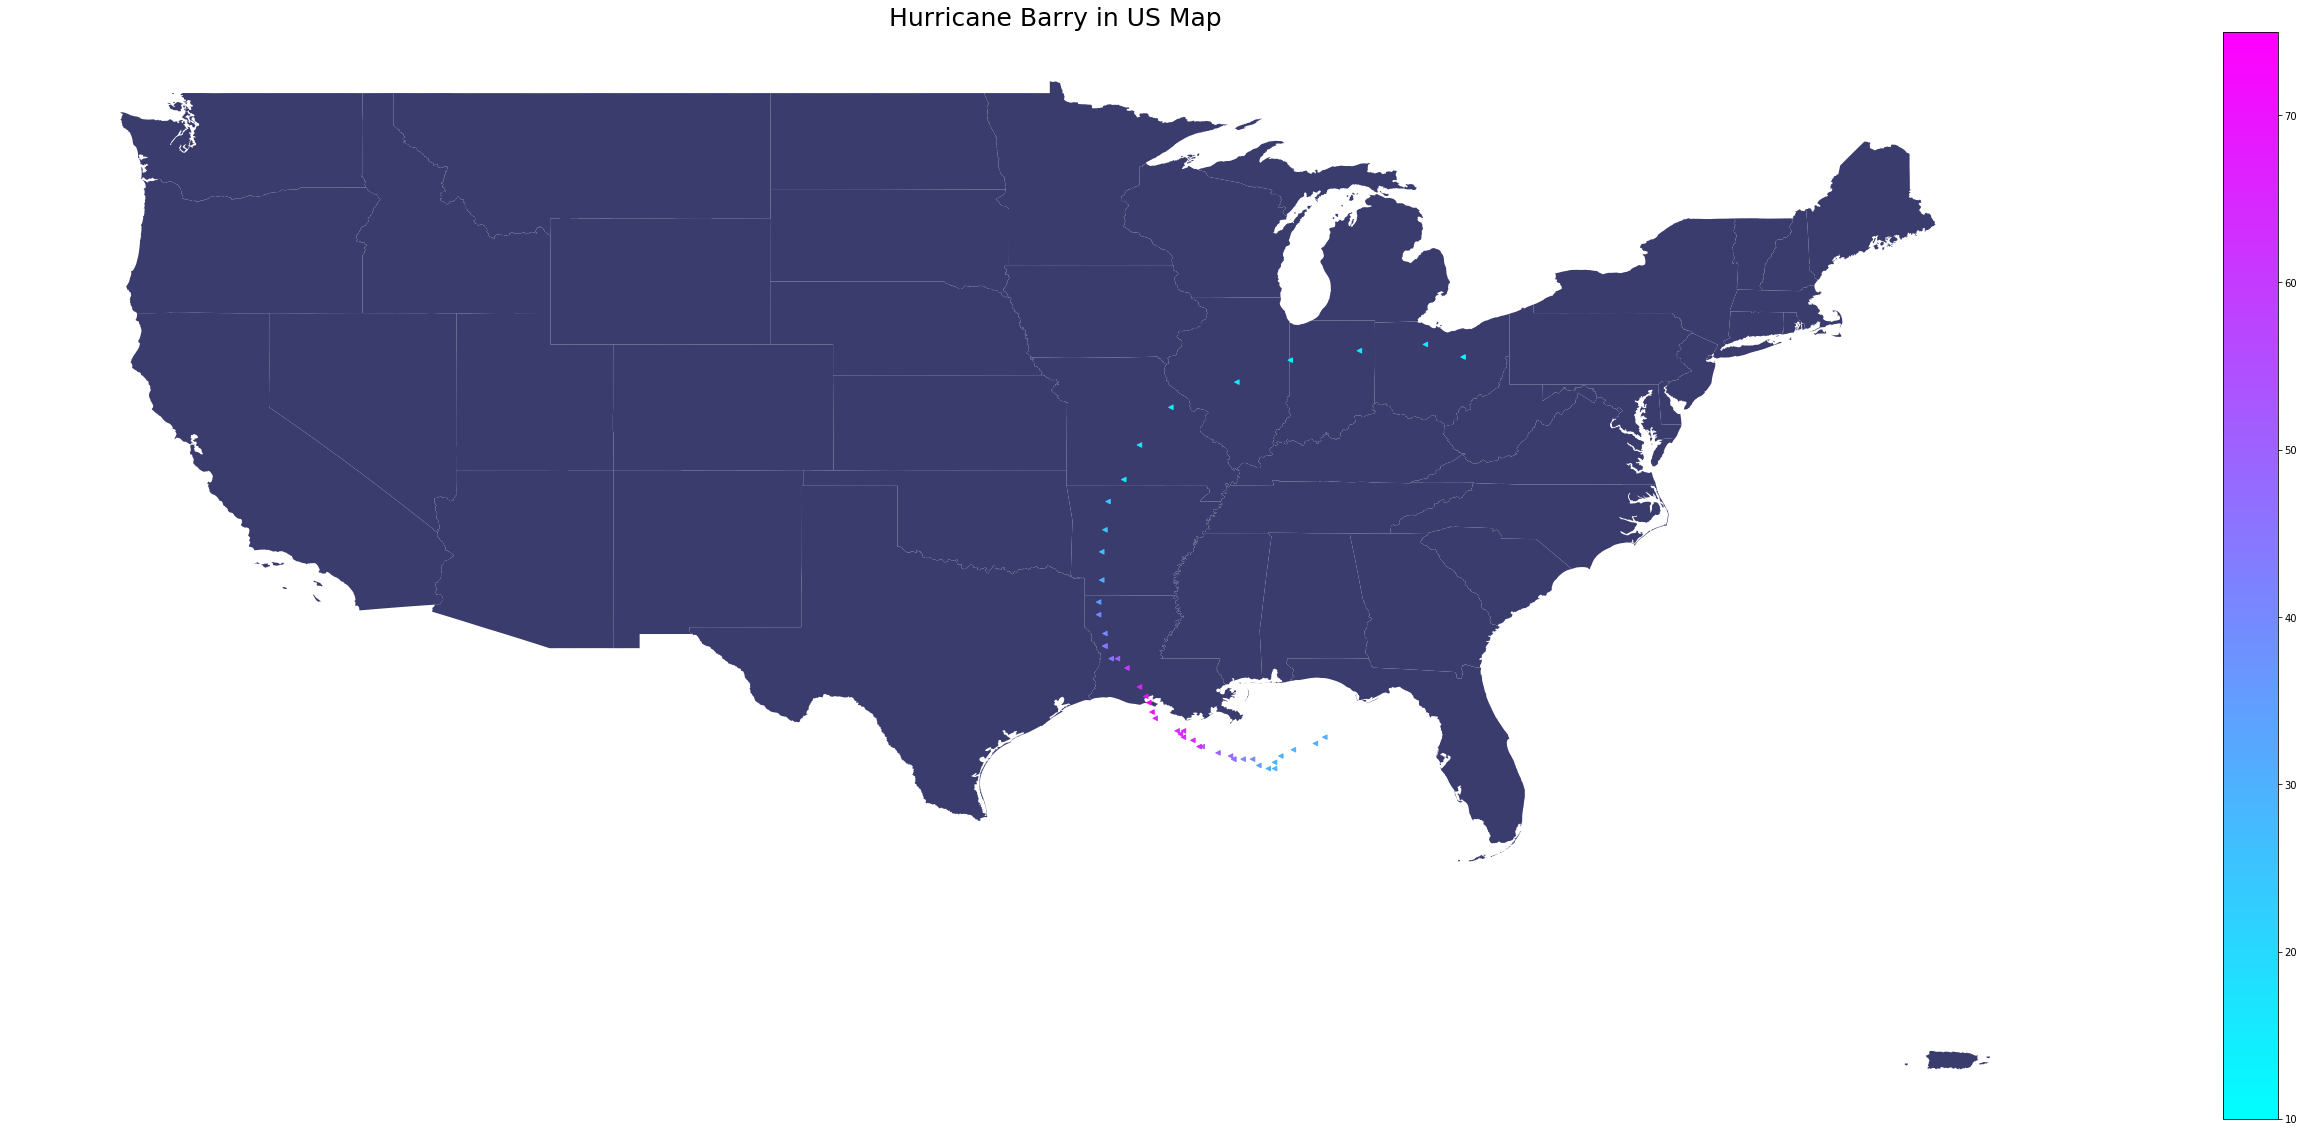

In [58]:
fig,ax = plt.subplots(1, figsize=(50,20))
base = country[country['NAME'].isin(['Alaska','Hawaii'])==False].plot(ax=ax, color='#3B3C6E')
barry.plot(ax=base, column='Wind', marker='<', markersize=20, cmap='cool', label='Wind speed(mph)', legend=True)
_ = ax.axis('off')
ax.set_title('Hurricane Barry in US Map', fontsize=25)
